<div align="center">

# JK Lakshmipat University
## Computational Data Analysis (ES1101)
## Sustainable Development Goals Project
### Team 15B - Zero Hunger

</div>
<hr>

##### Importing the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression

import geopandas as gpd
from geopandas import datasets
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

<hr>

#### Objective 1 - Swastik Kulshreshtha (2022BTech105)
To analyze the prevalence of stunting and malnutrition (wasting and overweightness) in children.
* To access the prevalence of stunting in children across the world.
* To access the prevalence of malnutrition in children across the world.
* To correlate the prevalence of stunting and malnutrition along with the population growth across the world.
* To illustrate the world regions requiring more work on removing stunting & malnutrition.
* To estimate the future trend of prevalence of stunting and malnutrition in 2025 and 2030 for various regions of the world. 

<hr>

Reading the Dataset

In [2]:
dataFrame = pd.read_csv("1 Data 1.csv")
dataPop = pd.read_csv("1 Data 2.csv")

Splitting the data based on Regions, Sub-regions and Countries

In [3]:
# Specify the UN M49 Codes
regions, subregions = (1,2,5,9,10,21,142,150), (11,13,14,15,17,18,19,29,30,34,35,39,53,54,57,61,143,145,151,154,155,199,202,419,432,722,830)
regionsIndex, subregionsIndex, countriesIndex = list(), list(), list(range(len(dataFrame)))

for i in regions:
    x = dataFrame.index[dataFrame['GeoAreaCode'] == i].tolist()
    for j in x:
        regionsIndex.append(j)
for i in subregions:
    x = dataFrame.index[dataFrame['GeoAreaCode'] == i].tolist()
    for j in x:
        subregionsIndex.append(j)
for i in regionsIndex+subregionsIndex:
    countriesIndex.remove(i)

# Segregate the Data according to the Codes
regionsData = dataFrame.loc[regionsIndex]
subregionsData = dataFrame.loc[subregionsIndex]
countriesData = dataFrame.loc[countriesIndex]

<div align='Center'>
<hr>

##### Problem Statement 1

</div>

Segregating the Data

In [4]:
# Specify the Data
stuntingData = countriesData.loc[(countriesData['Indicator']=='2.2.1')&(countriesData['SeriesCode']=='SH_STA_STNT')]
countries = np.unique(countriesData['GeoAreaName'].to_numpy())

# Convert the Data into Dictionary
stuntingRates = dict()
for i in countries:
    countryData = stuntingData.loc[stuntingData['GeoAreaName']==i]
    data = {k:v for k,v in countryData[['TimePeriod', 'Value']].to_dict('split')['data']}
    if data != {}:
        for j in data:
            try: data[j] = float(data[j])
            except: data[j] = 0
        rates = list(data.values())
        stuntingRates[i] = - ((rates[-1] / rates[0]) ** (1 / (len(rates) - 1)) - 1)

Calculating the Descriptive Statistical Information

In [5]:
# Calculate the Statistical Information
dataValues = np.array(tuple(stuntingRates.values()), dtype=float)
table = [np.mean(dataValues), np.median(dataValues), np.min(dataValues), np.max(dataValues)]
vals = {k:v for v,k in stuntingRates.items()}
table[2] = [table[2], vals[table[2]]]
table[3] = [table[3], vals[table[3]]]

# Print the Information
print(f'''The Statistical Info from the data available for the {len(vals)} out of {len(countries)} countries:
\tThe Mean Rate of Improvement in Prevalence of Stunting is:\t{table[0]}
\tThe Median Rate of Improvement in Prevalence of Stunting is:\t{table[1]}
\tThe Minimum Rate of Improvement in Prevalence of Stunting is:\t{table[2][0]} which is in {table[2][1]}
\tThe Maximum Rate of Improvement in Prevalence of Stunting is:\t{table[3][0]} which is in {table[3][1]}''')

The Statistical Info from the data available for the 160 out of 162 countries:
	The Mean Rate of Improvement in Prevalence of Stunting is:	0.02118318654660719
	The Median Rate of Improvement in Prevalence of Stunting is:	0.02025723301898652
	The Minimum Rate of Improvement in Prevalence of Stunting is:	-0.03833327002221365 which is in Libya
	The Maximum Rate of Improvement in Prevalence of Stunting is:	0.07696284742950776 which is in Tonga


Plotting the Graph

In [6]:
# Configure the Data
plotDF = pd.DataFrame({'Country': list(stuntingRates.keys()), 'Rate': list(stuntingRates.values())})

# Plot the Data
fig = px.box(x=dataValues, points='all')

# Customise the Data
fig.update_layout(title_text="Rate of Improvement in the Prevalence of Stunting", xaxis_title="Rate of Improvement")

# Show the Data
fig.show()

In [7]:
def kstest(data):
    data = sorted(data)
    cval = stats.norm.cdf(data)
    n = len(cval)
    Dplus = np.arange(1.0, n + 1) / n - cval
    Dplus = Dplus[Dplus.argmax()]
    Dminus = cval - np.arange(0.0, n)/n
    Dminus = Dminus[Dminus.argmax()]
    if Dplus > Dminus:
        D = Dplus
    else:
        D = Dminus
    probA = stats.ksone.sf(D, len(data)) * 2
    probB = np.clip(probA, 0, 1)
    return (D, probB)
    
kstest(list(stuntingRates.values()))

(0.48471098231507587, 3.887130866942939e-35)

<div align='Center'>
<hr>

##### Problem Statement 2

</div>

Segregating the Data

In [8]:
# Specify the Data
countries = np.unique(countriesData['GeoAreaName'].to_numpy())
wasteData = countriesData.loc[countriesData['SeriesCode']=='SH_STA_WASTN']
ovrwtData = countriesData.loc[countriesData['SeriesCode']=='SN_STA_OVWGT']

# Convert the Data into Dictionaries
wasteRates, ovrwtRates = dict(), dict()
for i in countries:
    countryWasteData = wasteData.loc[wasteData['GeoAreaName']==i]
    countryOvrWtData = ovrwtData.loc[ovrwtData['GeoAreaName']==i]
    dataW = {k:v for k,v in countryWasteData[['TimePeriod', 'Value']].to_dict('split')['data']}
    dataO = {k:v for k,v in countryOvrWtData[['TimePeriod', 'Value']].to_dict('split')['data']}
    if dataW != {} and dataO != {}:
        for j in dataW:
            try: dataW[j] = float(dataW[j])
            except: dataW[j] = 0
        for j in dataO:
            try: dataO[j] = float(dataO[j])
            except: dataO[j] = 0
        wRates, oRates = list(dataW.values()), list(dataO.values())
        try:
            wasteRates[i] = - ((wRates[-1] / wRates[0]) ** (1 / (len(wRates) - 1)) - 1)
            ovrwtRates[i] = - ((oRates[-1] / oRates[0]) ** (1 / (len(oRates) - 1)) - 1)
        except ZeroDivisionError: pass

Taking out Mean of Wasting & Overweight Data to find out the Mean Increase/Decrease in Malnutrition

In [9]:
meanMalnutRates = dict()
for i in wasteRates:
    meanMalnutRates[i] = np.mean((wasteRates[i], ovrwtRates[i]))

Calculating the Descriptive Statistical Information for the Rate of Improvement in Prevalence of Malnutrition

In [10]:
# Calculate the Statistical Information
table = [np.mean(list(meanMalnutRates.values())), np.median(list(meanMalnutRates.values())), np.min(list(meanMalnutRates.values())), np.max(list(meanMalnutRates.values()))]
vals = {k:v for v,k in meanMalnutRates.items()}
table[2] = [table[2], vals[table[2]]]
table[3] = [table[3], vals[table[3]]]

# Print the Information
print(f'''The Statistical Info from the data available for the {len(vals)} out of {len(countries)} countries:
\tThe Mean Rate of Improvement in Prevalence of Malnutrition is:\t{table[0]}
\tThe Median Rate of Improvement in Prevalence of Malnutrition is:\t{table[1]}
\tThe Minimum Rate of Improvement in Prevalence of Malnutrition is:\t{table[2][0]} which is in {table[2][1]}
\tThe Maximum Rate of Improvement in Prevalence of Malnutrition is:\t{table[3][0]} which is in {table[3][1]}''')

The Statistical Info from the data available for the 127 out of 162 countries:
	The Mean Rate of Improvement in Prevalence of Malnutrition is:	0.003389371219568598
	The Median Rate of Improvement in Prevalence of Malnutrition is:	0.017066560294318966
	The Minimum Rate of Improvement in Prevalence of Malnutrition is:	-1.2184135430045917 which is in Papua New Guinea
	The Maximum Rate of Improvement in Prevalence of Malnutrition is:	0.4237510657474796 which is in Tonga


Plotting the Graph

In [11]:
# Plot the Data
fig = go.Figure()
fig.add_trace(go.Box(x=list(wasteRates.values()), name="Wasted Rate"))
fig.add_trace(go.Box(x=list(meanMalnutRates.values()), name="Mean Nutrition Rate"))
fig.add_trace(go.Box(x=list(ovrwtRates.values()), name="Overweight Rate"))

# Customise the Graph
fig.update_layout(title_text="Rate of Improvement in Prevalence of Malnutrition", xaxis_title="Rates of Improvement", showlegend=False)

# # Show the Graph
fig.show()

In [12]:
kstest(list(meanMalnutRates.values()))

(0.3681067758995739, 6.093422607807081e-16)

<div align='Center'>
<hr>

##### Problem Statement 3

</div>

Segregating the Data

In [13]:
# Specify the Data
stntData = regionsData.loc[regionsData['SeriesCode']=='SH_STA_STNT']
wstData = regionsData.loc[regionsData['SeriesCode']=='SH_STA_WASTN']
ovwtData = regionsData.loc[regionsData['SeriesCode']=='SN_STA_OVWGT']
popData = dataPop.loc[dataPop['Year'].isin(range(2000, 2021))]['Total Population, as of 1 July (thousands)'].to_list()
regions = np.unique(regionsData['GeoAreaName'].to_numpy())

# Convert the Data into Dictionary
regData = dict()
for i in regions:
    myData1 = stntData.loc[regionsData['GeoAreaName']==i]
    myData1 = {k:float(v) for k,v in myData1[['TimePeriod', 'Value']].to_dict('split')['data']}
    myData2 = wstData.loc[regionsData['GeoAreaName']==i]
    myData2 = {k:float(v) for k,v in myData2[['TimePeriod', 'Value']].to_dict('split')['data']}
    myData3 = ovwtData.loc[regionsData['GeoAreaName']==i]
    myData3 = {k:float(v) for k,v in myData3[['TimePeriod', 'Value']].to_dict('split')['data']}
    regData[i] = {"Stunting": myData1, "Wasted": myData2, "Overweight": myData3}

Making the Correlation Table

In [14]:
corrDF = pd.DataFrame({
    'Stunting': regData['World']['Stunting'].values(), 
    'Overweight': regData['World']['Overweight'].values(),
    'Population': popData
    })
corrDF2 = pd.DataFrame({
    'stnt - mean(stnt)': (corrDF['Stunting'] - pd.Series(list(np.mean(corrDF['Stunting']) for i in range(21)))),
    'owt - mean(owt)': (corrDF['Overweight'] - pd.Series(list(np.mean(corrDF['Overweight']) for i in range(21)))),
    'pop - mean(pop)': (corrDF['Population'] - pd.Series(list(np.mean(corrDF['Population']) for i in range(21))))
})
corrDF2['sqr(stnt - mean(stnt))'] = corrDF2['stnt - mean(stnt)'] * corrDF2['stnt - mean(stnt)']
corrDF2['sqr(owt - mean(owt))'] = corrDF2['owt - mean(owt)'] * corrDF2['owt - mean(owt)']
corrDF2['sqr(pop - mean(pop))'] = corrDF2['pop - mean(pop)'] * corrDF2['pop - mean(pop)'] 

stntXowt, stntXpop, owtXpop = list(), list(), list()
for i in range(len(corrDF2)):
    stntXowt.append(corrDF2['stnt - mean(stnt)'][i] * corrDF2['owt - mean(owt)'][i])
    stntXpop.append(corrDF2['stnt - mean(stnt)'][i] * corrDF2['pop - mean(pop)'][i])
    owtXpop.append(corrDF2['owt - mean(owt)'][i] * corrDF2['pop - mean(pop)'][i])
corrDF2['(stnt - mean(stnt)) X (owt - mean(owt))'] = stntXowt
corrDF2['(stnt - mean(stnt)) X (pop - mean(pop))'] = stntXpop
corrDF2['(owt - mean(owt)) X (pop - mean(pop))'] = owtXpop

corrStntOwt = corrDF2['(stnt - mean(stnt)) X (owt - mean(owt))'].sum() / np.sqrt(corrDF2['sqr(stnt - mean(stnt))'].sum() * corrDF2['sqr(owt - mean(owt))'].sum())
corrStntPop = corrDF2['(stnt - mean(stnt)) X (pop - mean(pop))'].sum() / np.sqrt(corrDF2['sqr(stnt - mean(stnt))'].sum() * corrDF2['sqr(pop - mean(pop))'].sum())
corrOwtPop = corrDF2['(owt - mean(owt)) X (pop - mean(pop))'].sum() / np.sqrt(corrDF2['sqr(owt - mean(owt))'].sum() * corrDF2['sqr(pop - mean(pop))'].sum())

In [15]:
corrDF3 = pd.DataFrame({
        'Stunting': [1, corrStntOwt, corrStntPop],
        'Overweight': [corrStntOwt, 1, corrOwtPop],
        'Population': [corrStntPop, corrOwtPop, 1]
    },
    index=['Stunting', 'Overweight', 'Population']
)
corrDF3

,Stunting,Overweight,Population
Stunting,1.000000,-0.333233,-0.998465
Overweight,-0.333233,1.000000,0.359125
Population,-0.998465,0.359125,1.000000


In [16]:
fig = px.imshow(corrDF3, text_auto=True)
fig.update_layout(width=500, height=500)
fig.show()

<div align='Center'>
<hr>

##### Problem Statement 4

</div>

Calculating the Compound Annual Growth Rate (CAGR) from the Data

In [17]:
for i in regData:
    if i != 'World':
        stntRates = list(regData[i]['Stunting'].values())
        ovwtRates = list(regData[i]['Overweight'].values())
        try: 
            gr_Stunting = ((stntRates[-1] / stntRates[0]) ** (1 / (len(stntRates) - 1)) - 1)
            gr_Overweight = ((ovwtRates[-1] / ovwtRates[0]) ** (1 / (len(ovwtRates) - 1)) - 1)
            print(f"For the region {i},\nRate of Improvement in Stunting: {gr_Stunting}\nRate of Improvement in Overweight: {gr_Overweight}\n")
        except: pass

For the region Africa,
Rate of Improvement in Stunting: -0.014958531436904954
Rate of Improvement in Overweight: -0.007811454346558944

For the region Asia,
Rate of Improvement in Stunting: -0.026103649320611266
Rate of Improvement in Overweight: 0.0072552541834860484

For the region Europe,
Rate of Improvement in Stunting: -0.018967423584430376
Rate of Improvement in Overweight: 0.0012203166373554453

For the region Northern America,
Rate of Improvement in Stunting: 0.0
Rate of Improvement in Overweight: 0.011080947166022037

For the region Oceania,
Rate of Improvement in Stunting: 0.008511260352928263
Rate of Improvement in Overweight: 0.034018707807229376

For the region South America,
Rate of Improvement in Stunting: -0.02644821850482726
Rate of Improvement in Overweight: 0.007942576492167008



Making the Choropleth Maps for-

Requirement of Improvement in Stunting 

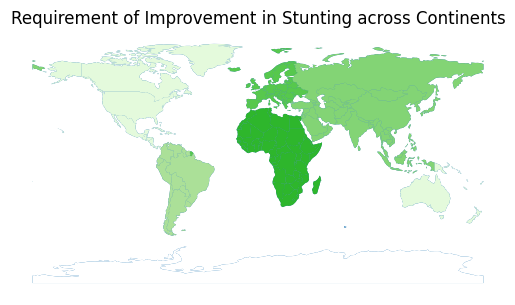

In [18]:
# Plot the Data
worldMap = gpd.read_file(datasets.get_path('naturalearth_lowres'))
world = worldMap.plot()
worldMap[(worldMap.continent=='Antarctica')].plot(color='#FFFFFF', ax=world)
worldMap[(worldMap.continent=='Africa')].plot(color='#2EB62C', ax=world)
worldMap[(worldMap.continent=='Asia')|(worldMap.name=='Russia')].plot(color='#83D475', ax=world)
worldMap[(worldMap.continent=='Europe')&(worldMap.name!='Russia')].plot(color='#57C84D', ax=world)
worldMap[(worldMap.continent=='North America')].plot(color='#E4FADC', ax=world)
worldMap[(worldMap.continent=='South America')].plot(color='#ABE098', ax=world)
worldMap[(worldMap.continent=='Oceania')].plot(color='#E4FADC', ax=world)

# Customise the Graph
plt.title("Requirement of Improvement in Stunting across Continents")
world.set_axis_off()

# Show the Graph
plt.show()

Requirement of Improvement in Overweight Controlling

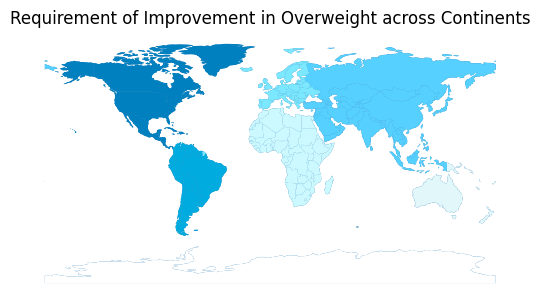

In [19]:
# Plot the Data
worldMap = gpd.read_file(datasets.get_path('naturalearth_lowres'))
world = worldMap.plot()
worldMap[(worldMap.continent=='Antarctica')].plot(color='#FFFFFF', ax=world)
worldMap[(worldMap.continent=='Africa')].plot(color='#CCF9FF', ax=world)
worldMap[(worldMap.continent=='Asia')|(worldMap.name=='Russia')].plot(color='#55D0FF', ax=world)
worldMap[(worldMap.continent=='Europe')&(worldMap.name!='Russia')].plot(color='#7CE8FF', ax=world)
worldMap[(worldMap.continent=='North America')].plot(color='#0080BF', ax=world)
worldMap[(worldMap.continent=='South America')].plot(color='#00ACDF', ax=world)
worldMap[(worldMap.continent=='Oceania')].plot(color='#E1F7FA', ax=world)

# Customise the Graph
plt.title("Requirement of Improvement in Overweight across Continents")
world.set_axis_off()

# Show the Graph
plt.show()

<div align='Center'>
<hr>

##### Problem Statement 5

</div>

Predicting Future Prevalence of Stunting and Malnutrition

In [51]:
# Function for Estimation
def lrEstimate(x,y):
    n = len(x)
    df = pd.DataFrame({'x': x, 'y': y})
    df['x2'] = df['x'] * df['x']
    df['y2'] = df['y'] * df['y']
    df['xy'] = df['x'] * df['y']
    slope = ((n*(df['xy'].sum())) - ((df['x'].sum()) * (df['y'].sum()))) / ((n*(df['x2'].sum()) - ((df['x'].sum())**2)))
    intercept = (((df['y'].sum()) * (df['x2'].sum())) - ((df['x'].sum()) * (df['xy'].sum()))) / ((n*(df['x2'].sum()) - ((df['x'].sum())**2)))
    return lambda x : slope * x + intercept


for i in regData:
    x = list(regData[i]['Stunting'].keys())
    y1 = list(regData[i]['Stunting'].values())
    y2 = list(regData[i]['Overweight'].values())
    if [] not in [x, y1, y2]:
        estimator = lrEstimate(x, y1)
        mymodel = list(map(estimator, x))
        data1 = list(int(estimator(j)) for j in (2025, 2030))
        print(f'''{i}:\n\tFor 2025, Estimated Prevalence of Stunting is {data1[-2]}%
        For 2030, Estimated Prevalence of Stunting is {data1[-1]}%''')

        estimator = lrEstimate(x, y2)
        mymodel = list(map(estimator, x))
        data2 = list(int(estimator(j)) for j in (2025, 2030))
        print(f'''\tFor 2025, Estimated Prevalence of Overweight is {data2[-2]}%
        For 2030, Estimated Prevalence of Overweight is {data2[-1]}%\n''')
        
        fig = px.scatter(pd.DataFrame({"Year": x+[2025,2030], "Stunting": y1+data1, "Overweight": y2+data2}),
        x="Year", y=["Stunting", "Overweight"], trendline='ols', trendline_color_override = 'blue',
        color_discrete_sequence=["green", "red"], title=f"Prevalence of Stunting and Overweight in {i}"
        )
        fig.update_layout(
            legend_title="Prevalence of",
            yaxis_title="Percentage (%)",
            legend=dict(orientation="h", x=1, y=1.02, xanchor="right", yanchor="bottom")
            )
        fig.show()

Africa:
	For 2025, Estimated Prevalence of Stunting is 27%
        For 2030, Estimated Prevalence of Stunting is 24%
	For 2025, Estimated Prevalence of Overweight is 4%
        For 2030, Estimated Prevalence of Overweight is 3%



Asia:
	For 2025, Estimated Prevalence of Stunting is 17%
        For 2030, Estimated Prevalence of Stunting is 13%
	For 2025, Estimated Prevalence of Overweight is 5%
        For 2030, Estimated Prevalence of Overweight is 5%



Europe:
	For 2025, Estimated Prevalence of Stunting is 4%
        For 2030, Estimated Prevalence of Stunting is 3%
	For 2025, Estimated Prevalence of Overweight is 8%
        For 2030, Estimated Prevalence of Overweight is 8%



Northern America:
	For 2025, Estimated Prevalence of Stunting is 2%
        For 2030, Estimated Prevalence of Stunting is 3%
	For 2025, Estimated Prevalence of Overweight is 9%
        For 2030, Estimated Prevalence of Overweight is 10%



Oceania:
	For 2025, Estimated Prevalence of Stunting is 21%
        For 2030, Estimated Prevalence of Stunting is 22%
	For 2025, Estimated Prevalence of Overweight is 14%
        For 2030, Estimated Prevalence of Overweight is 16%



South America:
	For 2025, Estimated Prevalence of Stunting is 6%
        For 2030, Estimated Prevalence of Stunting is 4%
	For 2025, Estimated Prevalence of Overweight is 8%
        For 2030, Estimated Prevalence of Overweight is 8%



World:
	For 2025, Estimated Prevalence of Stunting is 18%
        For 2030, Estimated Prevalence of Stunting is 15%
	For 2025, Estimated Prevalence of Overweight is 5%
        For 2030, Estimated Prevalence of Overweight is 5%



<hr>

#### Objective 2 - Sheetal Kanwar (2022BTech095)
To analyze the prevalence of anaemia in women, on the basis of pregnancy. Additionally, check the regions with lowest per capita food consumption and the people with food deficiency disabilities.
* To access the prevalence of anaemia in pregnant and non-pregnant women across the world.
* To check the world regions which have the lowest per capita food consumption in the year 2030.
* To access the difference in disability-adjusted life years (SEV) and annual % change (EAPC) between females and males in different regions and sub-regions across the world in 1990 and 2019.


<hr>

Reading the Datasets

In [21]:
dataPregnant = pd.read_csv("2 Data 1.csv")
dataNonPregnant = pd.read_csv("2 Data 2.csv")
dataFood = pd.read_csv("2 Data 3.csv")
dataSEV = pd.read_csv("2 Data 4.csv")

<div align='Center'>
<hr>

##### Problem Statement 1

</div>

In [22]:
years = list(map(int, dataPregnant.to_dict('split')['columns'][1:][::-1]))
regionsPreg = np.unique(dataPregnant['Location'].to_numpy())

fig = go.Figure()
for i in regionsPreg:
    data = dataPregnant.loc[dataPregnant['Location']==i].to_dict('split')['data'][0][1:][::-1]
    fig.add_trace(go.Scatter(x=years, y=data, name=i, mode='markers'))

fig.update_layout(
    title_text='Prevalence of Anaemia in Pregnant Women (2010-2019) by region',
    xaxis_title='Year', yaxis_title='Prevalence of Anaemia in Pregnant Women (%)', legend_title='Regions'
    )
fig.show()

In [23]:
def PearsonCorrelation(x, y):    
    df = pd.DataFrame({'x': x, 'y': y})
    df['x - u(x)'] = (df['x'] - pd.Series(list(np.mean(df['x']) for i in range(len(x)))))
    df['y - u(y)'] = (df['y'] - pd.Series(list(np.mean(df['y']) for i in range(len(y)))))
    df['(x - u(x))^2'] = df['x - u(x)'] ** 2
    df['(y - u(y))^2'] = df['y - u(y)'] ** 2

    xXy = []
    for i in range(len(df)):
        a = df['x - u(x)'][i] * df['y - u(y)'][i]
        xXy.append(a)
    df['(x - u(x)) X (y - u(y))'] = xXy
    corrN = sum(df['(x - u(x)) X (y - u(y))'])
    corrD = (sum(df['(x - u(x))^2']) * sum(df['(y - u(y))^2'])) ** 0.5
    corr = round(corrN / corrD, 5)
    return corr

In [24]:
# Prevalence of anaemia in pregnant women (aged 15-49) in 2019
pregnant_2019 = dataPregnant['2019']
# Prevalence of anaemia in non-pregnant women (aged 15-49) in 2019
non_pregnant_2019 = dataNonPregnant['2019']

# Calculate the correlation between the prevalence of anaemia in pregnant and non-pregnant women in 2019
correlation= PearsonCorrelation(pregnant_2019, non_pregnant_2019)
print(f"Correlation between pregnant and non-pregnant women in 2019: {correlation}")

# Prevalence of anaemia in pregnant women (aged 15-49) in 2009
pregnant_2009 = dataPregnant['2009']
# Prevalence of anaemia in non-pregnant women (aged 15-49) in 2009
non_pregnant_2009 = dataNonPregnant['2009']

#Calculate the correlation between the prevelence of anaemia in pregnant and non-pregnant women in 2009
correlation= PearsonCorrelation(pregnant_2009, non_pregnant_2009)
print(f"Correlation between pregnant and non-pregnant women in 2009: {correlation}")
print("\nThis indicates a strong correlation between the two variables, which means that there is a strong association between the prevalence of anaemia in pregnant and non-pregnant women in 2019.")

Correlation between pregnant and non-pregnant women in 2019: 0.98653
Correlation between pregnant and non-pregnant women in 2009: 0.98414

This indicates a strong correlation between the two variables, which means that there is a strong association between the prevalence of anaemia in pregnant and non-pregnant women in 2019.


<div align='Center'>
<hr>

##### Problem Statement 2

</div>

In [25]:
regions = dataFood['Region']
years = [1964, 1974, 1984, 1997, 2015, 2030]

fig = go.Figure()
for i in regions:
    data = dataFood.loc[dataFood['Region']==i].to_dict('split')['data'][0][1:]
    fig.add_trace(go.Scatter(x=years, y=data, name=i))

fig.update_layout(
    title_text='Global & Region per capita Food Consumption (kcal per capita per day)',
    xaxis_title='Year', yaxis_title='per Capita Food Consumption', legend_title='Regions'
    )
fig.show()

In [26]:
# Find the regions with the lowest numbers in the latest year (2030)
dataFood.sort_values("2030").head(2)

,Region,1964,1974,1984,1997,2015,2030
3,Sub-Saharan Africa,2058,2079,2057,2195,2360,2540
6,South Asia,2017,1986,2205,2403,2700,2900


In [27]:
# Define the Function
def ttest(x, popmean):
    n = len(x)
    var_x = np.var(x, ddof = 1)  
    std = np.sqrt((var_x) / 2)
    tval = (np.mean(x) - popmean) / (std * np.sqrt(2 / n))  
    dof = 2 * n - 2
    pval = 1 - stats.t.cdf(-tval, df = dof)*2
    return tval, pval

# Define the threshold or benchmark value
threshold = 3000

# Perform the t-test
t, p = ttest(dataFood['2030'], threshold)
# Check the p-value
if p < 0.05:
    print("Reject the null hypothesis, the mean of the food deficiency diseases for the region of interest is not equal to the threshold.")
else:
    print("Fail to reject the null hypothesis, the mean of the food deficiency diseases for the region of interest is equal to the threshold.")

Fail to reject the null hypothesis, the mean of the food deficiency diseases for the region of interest is equal to the threshold.


<div align='Center'>
<hr>

##### Problem Statement 3

</div>

In [28]:
regions = dataSEV['region']
sev_1990 = dataSEV['Age standardized SEV in 1990 for both sexes']
sev_2019 = dataSEV['Age standardized SEV in 2019 for both sexes']

fig = go.Figure()
fig.add_trace(go.Bar(x=regions, y=sev_1990, name='1990'))
fig.add_trace(go.Bar(x=regions, y=sev_2019, name='2019'))

fig.update_layout(
    xaxis_title='Region', yaxis_title='Age-standardized SEV', legend_title='Year',
    legend=dict(orientation="h", x=1, y=1.02, xanchor="right", yanchor="bottom"),
    title_text='Age-standardized SEV for both Sexes'
    )
fig.show()

In [29]:
females_1990 = dataSEV['Age standardized SEV in 1990 for females']
females_2019 = dataSEV['Age standardized SEV in 2019 for  females']
males_1990 = dataSEV['Age standardized SEV in 1990 for males']
males_2019 = dataSEV['Age standardized SEV in 2019 for males']

# Calculate the difference between SEV for females and males in 1990 and 2019
diff_1990 = females_1990 - males_1990
diff_2019 = females_2019 - males_2019

# Print the difference between SEV for females and males in 1990 and 2019
print("Difference in SEV between females and males in 1990:", diff_1990)
print("Difference in SEV between females and males in 2019:", diff_2019)

Difference in SEV between females and males in 1990: 0      8.8
1      8.8
2      5.8
3     10.6
4     11.5
5     11.2
6     11.6
7     14.8
8     11.3
9      7.3
10    11.1
11     7.1
12     9.0
13     3.8
14     5.5
15     8.9
16     4.4
17     5.1
18     7.5
19    11.1
20    10.8
21     6.7
22    10.2
23    11.0
24    10.4
25     6.7
26    16.7
dtype: float64
Difference in SEV between females and males in 2019: 0      9.4
1      9.0
2      6.5
3     10.2
4     11.2
5     10.5
6     10.5
7     14.8
8     10.9
9      6.9
10    10.3
11     6.6
12     8.4
13     3.7
14     5.3
15     7.6
16     6.6
17     4.8
18     7.0
19    10.9
20    10.3
21     6.1
22     9.9
23    11.5
24    10.5
25     7.1
26    16.0
dtype: float64


<hr>

#### Objective 3 - Puneet (2022BTech077)
To rank world regions based on farming and pastoral economy of the countries.
* To analyze the rate of farming sales and animal feed expenditure across the world.
* To rank the world regions based on the analysis before.
* To correlate the rates of farming sales and animal feed expenditure.

<hr>

Reading the Datasets

In [30]:
dataFarming = pd.read_csv("3 Data 1.csv")
dataAnimals = pd.read_csv("3 Data 2.csv")

Splitting the Dataset

In [31]:
# Specify the Data
countriesInFarmingData = np.unique(dataFarming['Country or Area'].to_numpy())
countriesInAnimalData = np.unique(dataAnimals['Country or Area'].to_numpy())

# Convert the Dataset to Dictionary
allData = dict()
for i in countriesInAnimalData:       # Lesser Size
  fData = dataFarming.loc[dataFarming['Country or Area']==i]
  aData = dataAnimals.loc[(dataAnimals['Country or Area']==i)&(dataAnimals['Unit']=='Mil. USD')]

  y1 = np.unique(fData['Year'].to_numpy())
  y2 = np.unique(aData['Year'].to_numpy())

  if len(y1) != 0 and len(y2) != 0:
    fCountryData = fData['Value'].to_list()
    aCountryData = aData['Value'].to_list()
    allData[i] = {
      'Farming': {k:v for k,v in zip(y1, fCountryData)},
      'Animals': {k:v for k,v in zip(y2, aCountryData)}
      }

<div align='Center'>
<hr>

##### Problem Statement 1

</div>

Calculating the Growth Rates

In [32]:
# Define the Growth Rate Function
def growthRate(dataset):
  gr = -((dataset[-1] / dataset[0]) ** (1 / (len(dataset) - 1)) - 1)
  return gr

# Calculate and Print the Growth Rates
print("The Growth Rate in the sector of Farming Sales and Animal Feed Spendings in-")
growthRatesData = dict()
for i in allData:
  fData = allData[i]['Farming']
  aData = allData[i]['Animals']
  try:
    fGrowth = growthRate(list(fData.values()))
    aGrowth = growthRate(list(aData.values()))
    growthRatesData[i] = {
      'Farming Sales':fGrowth,
      'Animal Feed Spendings':aGrowth
      }
    print(f"\t{i} are {fGrowth} and {aGrowth}, respectively.")
  except:
    pass

The Growth Rate in the sector of Farming Sales and Animal Feed Spendings in-
	Albania are 0.046539054149960735 and 0.03680742214566357, respectively.
	Brazil are 0.0663700492936562 and 0.0846220713615713, respectively.
	Bulgaria are 0.015375657351417216 and 0.06650091789326595, respectively.
	Canada are 0.031505580629358265 and 0.04527139056921026, respectively.
	Chile are 0.06186134096717577 and -0.06430100470212419, respectively.
	China, Hong Kong Special Administrative Region are 0.04981374021152096 and 0.07807033065752833, respectively.
	Czechia are 0.017435605870597337 and 0.03952857906914142, respectively.
	Denmark are -0.004091227143505183 and 0.07341455906226202, respectively.
	Dominican Republic are 0.09783166675290811 and 0.12771195721597894, respectively.
	Ecuador are 0.030018065324903143 and 0.13203975608901397, respectively.
	Estonia are 0.02969161354511718 and 0.06200677576657743, respectively.
	Finland are 0.008895535569544255 and 0.013529363276342798, respectively.
	Fra

Converting the Data to List

In [33]:
cData = list()
fData = list()
aData = list()
for i in growthRatesData:
  cData.append(i)
  fData.append(growthRatesData[i]['Farming Sales'])
  aData.append(growthRatesData[i]['Animal Feed Spendings'])

Other Statistical Information regarding Total Farming Sales

In [34]:
# Calculate the Statistical Information
fMean = np.mean(fData)
fMedian = np.median(fData)
fMode = stats.mode(fData, keepdims=False)
fStd = np.std(fData)
fVar = np.var(fData)

# Print the Information
print("The Mean of Total Farming Sales is", fMean)
print("The Median of Total Farming Sales is", fMedian)
print("The Mode of Total Farming Sales is", fMode)
print("The Standard Deviation of Total Farming Sales is", fStd)
print("The Variance of Total Farming Sales is", fVar)

The Mean of Total Farming Sales is 0.040066348311678865
The Median of Total Farming Sales is 0.027156679411287854
The Mode of Total Farming Sales is ModeResult(mode=-0.01990232048802132, count=1)
The Standard Deviation of Total Farming Sales is 0.03828504206186734
The Variance of Total Farming Sales is 0.0014657444456789518


Other Statistical Information regarding Total Animal Feeding Expenditure

In [35]:
# Calculate the Statistical Information
aMean = np.mean(aData)
aMedian = np.median(aData)
aMode = stats.mode(aData, keepdims=False)
aStd = np.std(aData)
aVar = np.var(aData)

# Print the Information
print("The Mean of Total Animal Feeding Expenditure is", aMean)
print("The Median of Total Animal Feeding Expenditure is", aMedian)
print("The Mode of Total Animal Feeding Expenditure is", aMode)
print("The Standard Deviation of Total Animal Feeding Expenditure is", aStd)
print("The Variance of Total Animal Feeding Expenditure is", aVar)

The Mean of Total Animal Feeding Expenditure is 0.09438209056575687
The Median of Total Animal Feeding Expenditure is 0.06650091789326595
The Mode of Total Animal Feeding Expenditure is ModeResult(mode=-0.26870440620516023, count=1)
The Standard Deviation of Total Animal Feeding Expenditure is 0.15754712196007697
The Variance of Total Animal Feeding Expenditure is 0.024821095637903367


<div align='Center'>
<hr>

##### Problem Statement 2

</div>

Ranking the Countries

In [36]:
# Specify the Data
dat = list(zip(fData, aData))

# Calculate the Rank from Eigenvalue
dataarray = list()
for x in dat:
    for y in dat:
        if (x[0] == y[0]) and (x[1] == y[1]):
            dataarray.append(0)
        elif (x[0] <= y[0]) and (x[1] <= y[1]):
            dataarray.append(1)
        elif (x[0] <= y[0]) and (x[1] >= y[1]):
            dataarray.append(2)
        elif (x[0] >= y[0]) and (x[1] <= y[1]):
            dataarray.append(3)
        elif (x[0] >= y[0]) and (x[1] >= y[1]):
            dataarray.append(4)
matrix = np.array(dataarray).reshape(43,43)
eigVec = np.array([[1] for _ in range(43)])
for _ in range(7):
    eigVec = np.matmul(matrix, eigVec)
    eigVal = np.max(eigVec)
    eigVec = eigVec / eigVal

dat2 = list(zip(cData, [i[0] for i in eigVec]))
dat3 = sorted(dat2, key=lambda x: x[1], reverse=True)

# Print the Ranks
for i in range(len(dat3)):
    print(i+1, dat3[i][0])

1 Jordan
2 India
3 Sri Lanka
4 Dominican Republic
5 Nepal
6 Mongolia
7 Nigeria
8 Georgia
9 Brazil
10 Uruguay
11 Mexico
12 Kenya
13 State of Palestine
14 Ecuador
15 China, Hong Kong Special Administrative Region
16 Poland
17 Chile
18 Albania
19 Mozambique
20 Canada
21 Estonia
22 Ireland
23 Netherlands
24 Romania
25 Norway
26 United Kingdom
27 Hungary
28 Latvia
29 Slovakia
30 Iceland
31 Slovenia
32 Bulgaria
33 Czechia
34 France
35 Germany
36 Denmark
37 Sweden
38 Lithuania
39 Portugal
40 Finland
41 Spain
42 Italy
43 Greece


<div align='Center'>
<hr>

##### Problem Statement 3

</div>

Plotting a Bar Graph

In [37]:
# Plot the Data
fig = go.Figure()
fig.add_trace(go.Bar(x=cData, y=fData, name="Farming Sales", marker_color='green'))
fig.add_trace(go.Bar(x=cData, y=aData, name="Animal Feed Expenditure", marker_color='yellow'))

# Customise the Graph
fig.update_layout(
    width=1250, height=1000,
    barmode='stack',
    title_text="Growth Rates in Farming Sales and Animal Feeding Expenditure by Country",
    xaxis_title="Countries",
    yaxis_title="Growth Rate"
)

# # Show the Graph
fig.show()

Making a Normal Distribution Curve

In [38]:
x = np.linspace(-0.8, 0.8, 1000)
y1 = stats.norm.pdf(x, fMean, fStd)
y2 = stats.norm.pdf(x, aMean, aStd)

Making the Graph

In [39]:
# Plot the Data
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y1, name="Farming Sales", mode='lines'))
fig.add_trace(go.Scatter(x=x, y=y2, name="Animal Feeding Expenditure", mode='lines'))

# Customise the Graph
fig.update_layout(
    title_text="Normal Distribution Curve for Growth Rate in Farming Sales and Animal Feeding Expenditure",
    xaxis_title="Percentage (%)",
    yaxis_title="Probability Density",
    showlegend=True)

# # Show the Graph
fig.show()

<hr>

#### Objective 4 - Riya Gupta (2022BTech086)
To analyze countries on the basis of global hunger index and GDP per capita.
* To comprehend the rate of improvement in hunger index and GDP across various regions.
* To check whether *“Hunger Index is a crucial indicator for food security and one that historically has been neglected in the context of developing countries.”*
* To illustrate the relationship between food deficiency diseases, and agricultural economy.


<hr>

Reading the Datasets

In [40]:
dataGHI = pd.read_csv("4 Data 1.csv")
dataGDP = pd.read_csv("4 Data 2.csv")

Handling the Null Values

In [41]:
dataGHI = dataGHI.fillna(0)
dataGDP = dataGDP.fillna(0)

<div align='Center'>
<hr>

##### Problem Statement 1

</div>

Calculating the World Data on the basis of All Countries

In [42]:
# Function for Handling Non-Float Values
def converter(array):
    narray = list()
    for i in range(len(array)):
        fNum = 2.5
        try:
            fNum = float(array[i])
        except:
            pass
        narray.append(fNum)
    return narray

ghi2000 = converter(dataGHI['2000'].to_list())
ghi2007 = converter(dataGHI['2007'].to_list())
ghi2014 = converter(dataGHI['2014'].to_list())
ghi2022 = converter(dataGHI['2022'].to_list())

# Configure the Data
yearsGHI = ['2000', '2007', '2014', '2022']
valueGHI = [np.mean(ghi2000), np.mean(ghi2007), np.mean(ghi2014), np.mean(ghi2022)]

gdpData = dataGDP.loc[dataGDP['Country Name']=='World'].to_dict('split')
yearsGDP = gdpData['columns'][4:]
valueGDP = gdpData['data'][0][4:]

Making the Graph

In [43]:
# Plot the Data
fig = make_subplots(rows=1, cols=2, subplot_titles=("Global Hunger Index", "GDP per Capita"))
fig.add_trace(go.Scatter(
    x=yearsGHI,
    y=valueGHI,
    mode='lines+markers'),
    row=1, col=1
    )
fig.add_trace(go.Scatter(
    x=yearsGDP,
    y=valueGDP,
    mode='lines+markers'),
    row=1, col=2
    )

# Customise the Graph
fig.update_xaxes(title_text="Years", row=1, col=1)
fig.update_xaxes(title_text="Years", row=1, col=2)
fig.update_yaxes(title_text="Hunger Score", row=1, col=1)
fig.update_yaxes(title_text="GDP (in million $)", row=1, col=2)
fig.update_layout(showlegend=False)

# Show the Graph
fig.show()

<div align='Center'>
<hr>

##### Problem Statement 2

</div>

State the Hypothesis

${\alpha} = 0.05 (5\%)$

$H_{0}: {\mu}_{2000} {\ge} {\mu}_{2022}$

$H_{a}: {\mu}_{2000} < {\mu}_{2022}$

In [44]:
def ttest(data1, data2, tail=2):
    mean1 = np.mean(data1)
    mean2 = np.mean(data2)
    std1 = np.std(data1)
    std2 = np.std(data2)
    n1 = len(data1)
    n2 = len(data2)
    tN = mean1 - mean2
    tD = np.sqrt(((std1**2)/n1) + ((std2**2)/n2))
    t = tN / tD
    if tail == 2:
        p = stats.t.sf(abs(t), df=n1-1)*2
    elif tail in (-1,1):
        p = stats.t.sf(abs(tail*t), df=n1-1)
    else:
        return None
    return (t, p)

x = ttest(ghi2000, ghi2022)
x

(5.174011353005595, 9.306383193067887e-07)

As the P-Value comes out to be $9.306383193067887e-07$, which is lesser than $\alpha$, therefore, we reject the Null Hypothesis.

Hence, we can conclude that even though developing countries do not account for Hunger Index, but they still do some work to ensure food security and food production.

<div align='Center'>
<hr>

##### Problem Statement 3

</div>

Make the Correlation Heatmap

In [45]:
# Define the Pearson Correlation Function
def corrPearson(x,y):
    df = pd.DataFrame({'x': x, 'y': y})
    df2 = pd.DataFrame({
        'x - mean(x)': (df['x'] - pd.Series(list(np.mean(df['x']) for i in range(len(x))))),
        'y - mean(y)': (df['y'] - pd.Series(list(np.mean(df['y']) for i in range(len(y)))))
    })
    df2['sqr(x - mean(x))'] = df2['x - mean(x)'] * df2['x - mean(x)']
    df2['sqr(y - mean(y))'] = df2['y - mean(y)'] * df2['y - mean(y)']

    xXy = list()
    for i in range(len(df2)):
        xXy.append(df2['x - mean(x)'][i] * df2['y - mean(y)'][i])
    df2['(x - mean(x)) X (y - mean(y))'] = xXy

    return df2['(x - mean(x)) X (y - mean(y))'].sum() / np.sqrt(df2['sqr(x - mean(x))'].sum() * df2['sqr(y - mean(y))'].sum())

# Add the Data
alldata = {
    "Prevalence of Stunting": [-0.014, 0, -0.026, -0.018, 0.0, 0.0, -0.026],
    "Prevalence of Malnutrition": [-0.007, 0, 0.007, 0.001, 0.0, 0.011, 0.007],
    "Prevalence of Anaemia in Women": [42.8,0,47.15,21.05,18.75,17.1,17.1],
    "Annual Farming Sales": [0.09,0,0.08,0.01,0.05,0.07,0.07],
    "Annual Animal Feed Expenditure": [0.03,0,0.33,0.06,0.00,0.07,0.00],
    "Global Hunger Index": [10.12,0,6.36,4.91,2.81,5.4,6.978],
    "GDP per Capita": [1.809,0,5.635,25.851,35.087,37.477,8.520]
}

# Create Correlation Table
correlation = dict()
for i in alldata:
    correlation[i] = list()
    for j in alldata:
        correlation[i].append(corrPearson(alldata[i], alldata[j]))
correlation = pd.DataFrame(correlation, index=list(correlation.keys()))

In [46]:
# Plot the Data
fig = px.imshow(correlation, text_auto=True)

# Show the Graph
fig.show()

<hr>